<a href="https://colab.research.google.com/github/alishachandni/Cloud/blob/main/brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing dataset: Brain MRI Tumor


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0/156 [D loss: 0.6877092123031616, G loss: 0.7084630727767944, Adversarial Loss: 0.7084630727767944, Contextual Loss: 0.2425275444984436, Total Loss: 0.950990617275238]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
32/156 [D loss: 0.6901731491088867, G loss: 0.6665941476821899, Adversarial Loss: 0.6665941476821899, Contextual Loss: 0.2505935728549957, Total Loss: 0.9171876907348633]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
64/156 [D loss: 0.6907721757888794, G loss: 0.629299521446228, Adversarial Loss: 0.629299521446228, Contextual Loss: 0.23221063613891602, Total Loss: 0.861510157585144]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
96/156 [D loss: 0.6911591291427612, G loss: 0.5999389886856079, Adversarial Loss: 0.5999389886856079, Contextual Loss: 0.22686971724033356, Total Loss: 0.8268086910247803]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
128/156 [D loss: 0.6914569735527039, G loss: 0.5759111046791077, Adversarial Loss: 0.5759111046791077, Contextual Loss: 0.2515254020690918, Total Loss: 0.8274365067481995]
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0/156 [D loss: 0.6915342211723328, G loss: 0.5407496094703674, Adversarial Loss: 0.5407496094703674, Contextual Loss: 0.24507327377796173, Total Loss: 0.785822868347168]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
32/156 [D loss: 0.6919617652893066, G loss: 0.5218272805213928, Adversarial Loss: 0.5218272805213928, Contextual Loss: 0.25386175513267517, Total Loss: 0.7756890058517456]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
64/156 [D loss: 0.6922377347946167, G loss: 0.49861595034599304, Adversarial Loss: 0.49861595034599304, Contextual Loss: 0.23585081100463867, Total Loss: 0.7344667911529541]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
96/156 [D loss: 0.6925495266914368, G loss: 0.47270020842552185, Adversarial Loss: 0.47270020842552185, Conte

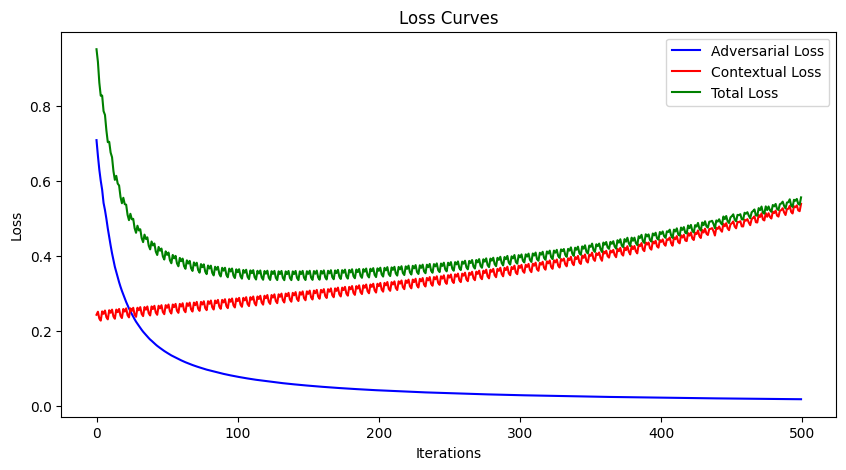

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step
AUC: 0.689, Precision: 0.517, Recall: 0.789, F1-Score: 0.625


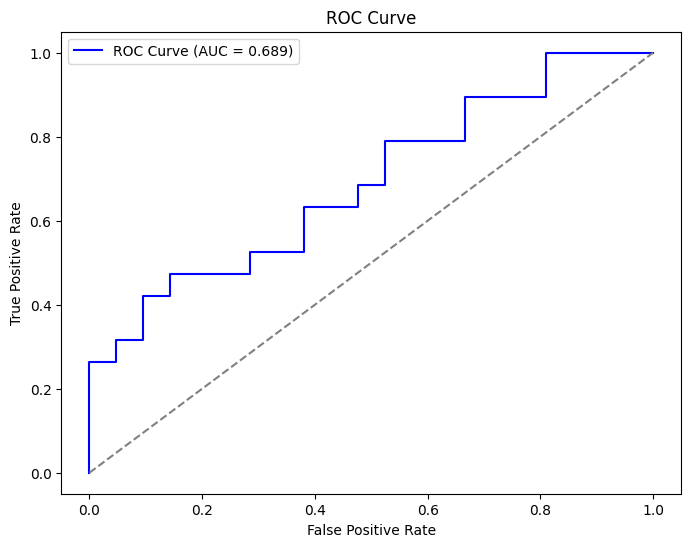

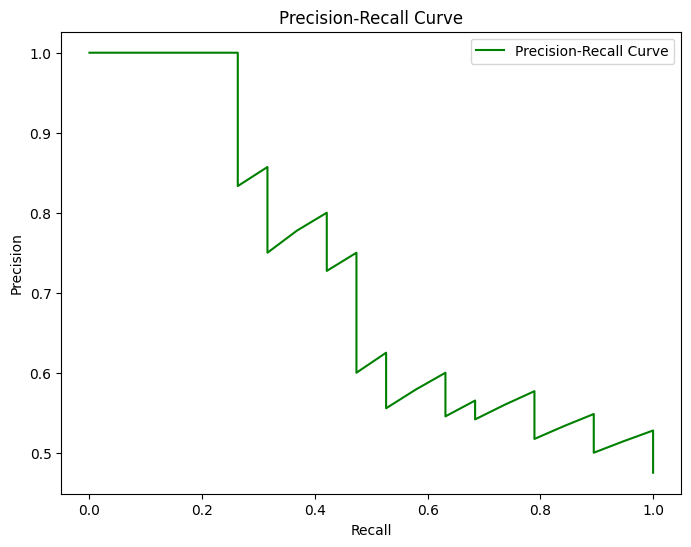

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Final Project/Brain MRI/brain_tumor_dataset'

# Define image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Load and preprocess images
def load_and_preprocess_images(dataset_path):
    images = []
    labels = []
    for label in ['no', 'yes']:
        class_path = os.path.join(dataset_path, label)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = image.load_img(img_path, target_size=IMG_SIZE)
            img = image.img_to_array(img) / 255.0
            images.append(img)
            labels.append(0 if label == 'no' else 1)  # 0 for no tumor, 1 for tumor
    return np.array(images), np.array(labels)

# LSTM-GAN Model
def build_lstm_gan(input_shape):

    generator = models.Sequential([
        layers.Dense(128 * 32 * 32, input_dim=100),
        layers.Reshape((32, 32, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(3, (4, 4), strides=(1, 1), padding='same', activation='tanh')
    ])


    discriminator = models.Sequential([
        layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

    # LSTM-GAN
    gan_input = layers.Input(shape=(100,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = models.Model(gan_input, gan_output)

    return generator, discriminator, gan

# Compile models
def compile_models(generator, discriminator, gan):
    discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.trainable = False
    gan.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM-GAN
def train_lstm_gan(generator, discriminator, gan, X_train, epochs=100, batch_size=32):
    d_losses = []
    g_losses = []
    adversarial_losses = []
    contextual_losses = []

    for epoch in range(epochs):
        print(f'Epoch {epoch+1}/{epochs}')
        for i in range(0, X_train.shape[0], batch_size):
            real_images = X_train[i:i+batch_size]
            current_batch_size = real_images.shape[0]

            noise = np.random.normal(0, 1, (current_batch_size, 100))
            generated_images = generator.predict(noise)

            real_labels = np.ones((current_batch_size, 1))
            fake_labels = np.zeros((current_batch_size, 1))

            # Train discriminator
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train generator
            valid_y = np.ones((current_batch_size, 1))
            g_loss = gan.train_on_batch(noise, valid_y)

            # Calculate loss components
            adversarial_loss = g_loss[0]  # Generator loss
            contextual_loss = np.mean(np.abs(real_images - generated_images))
            total_loss = adversarial_loss + contextual_loss

            adversarial_losses.append(adversarial_loss)
            contextual_losses.append(contextual_loss)
            d_losses.append(d_loss[0])
            g_losses.append(g_loss[0])

            print(f'{i}/{X_train.shape[0]} [D loss: {d_loss[0]}, G loss: {g_loss[0]}, Adversarial Loss: {adversarial_loss}, Contextual Loss: {contextual_loss}, Total Loss: {total_loss}]')

    return d_losses, g_losses, adversarial_losses, contextual_losses

# Plot Loss Curves
def plot_losses(adversarial_losses, contextual_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(adversarial_losses, label='Adversarial Loss', color='blue')
    plt.plot(contextual_losses, label='Contextual Loss', color='red')
    plt.plot(np.array(adversarial_losses) + np.array(contextual_losses), label='Total Loss', color='green')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.show()

# Plot ROC and Precision-Recall Curves
def plot_curves(y_true, y_pred):

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Evaluate model
def evaluate_model(discriminator, X_test, y_test):
    y_pred = discriminator.predict(X_test).flatten()
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, np.round(y_pred))
    recall = recall_score(y_test, np.round(y_pred))
    f1 = f1_score(y_test, np.round(y_pred))
    print(f'AUC: {auc_score:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}')
    plot_curves(y_test, y_pred)

# Main function
def main():
    print('Processing dataset: Brain MRI Tumor')
    X, y = load_and_preprocess_images(dataset_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    generator, discriminator, gan = build_lstm_gan(X_train.shape[1:])
    compile_models(generator, discriminator, gan)

    d_losses, g_losses, adv_losses, ctx_losses = train_lstm_gan(generator, discriminator, gan, X_train)

    plot_losses(adv_losses, ctx_losses)
    evaluate_model(discriminator, X_test, y_test)

if __name__ == '__main__':
    main()
